In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [56]:
sfx_data=pd.read_csv('data2/sfx.csv')
sfx_data

,id,is_free,download_count,play_count,created_at,is_visible,grade,playtime
0,1,True,122,1901,2018-12-21 01:48:19.092798,True,2.3.F,14
1,2,True,34,951,2018-12-21 01:48:19.333004,True,2.3.F,2
2,3,True,27,588,2018-12-21 01:48:19.473285,True,2.3.F,86
3,4,True,40,634,2018-12-21 01:48:19.687445,True,2.3.F,21
4,5,True,34,517,2018-12-21 01:48:19.875785,True,2.3.F,20
...,...,...,...,...,...,...,...,...
3647,4166,False,2,86,2022-09-28 15:57:49.877708,True,2.1.A,6
3648,4167,False,3,59,2022-09-28 15:57:50.996585,True,2.1.A,3
3649,4168,False,35,162,2022-09-28 15:57:51.784597,True,2.1.A,1
3650,4169,False,2,52,2022-09-28 15:57:52.653573,True,2.1.A,9


In [57]:
tag_data=pd.read_csv('data2/tag.csv')
tag_data

,id,name,model_id,model_type
0,1,드라이브,1633,Music::Song
1,2,힐링,1633,Music::Song
2,3,가을,1633,Music::Song
3,9,현자타임,1651,Music::Song
4,11319,총,95,Music::SoundEffect
...,...,...,...,...
170078,327133,예능,12,Scene::VideoTemplate
170079,327134,게임방송,12,Scene::VideoTemplate
170080,327135,축하,12,Scene::VideoTemplate
170081,327136,귀여운,12,Scene::VideoTemplate


In [58]:
sfx_tag_data=tag_data[tag_data['model_type']=='Music::SoundEffect']
sfx_tag_data

,id,name,model_id,model_type
4,11319,총,95,Music::SoundEffect
5,11320,gunshot,95,Music::SoundEffect
6,11321,전쟁,95,Music::SoundEffect
7,11322,전투,95,Music::SoundEffect
8,11323,군대,95,Music::SoundEffect
...,...,...,...,...
169300,326335,백스페이스,4170,Music::SoundEffect
169301,326336,엔터,4170,Music::SoundEffect
169302,326337,누르는,4170,Music::SoundEffect
169303,326338,두드림,4170,Music::SoundEffect


In [59]:
sfx_tag_data.groupby('model_id').count()

,id,name,model_type
model_id,,,
1,15,15,15
2,17,17,17
3,12,12,12
4,16,16,16
5,15,15,15
...,...,...,...
4166,17,17,17
4167,11,11,11
4168,13,13,13


In [60]:
sfx_tag_data.groupby('name').count()['id']

name
1 2 3 combo punch    1
10                   1
10 count             1
10 gauge             5
10 gauge shotgun     1
                    ..
힘듬                   3
힘없는                  5
힘줘서두드리는              1
힙한                   1
힙합                   6
Name: id, Length: 14513, dtype: int64

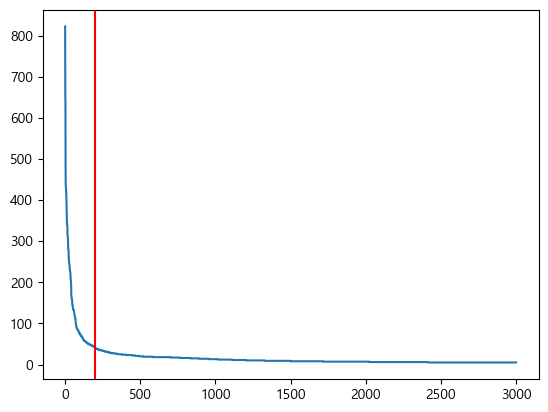

In [61]:
data=sfx_tag_data.groupby('name').count()['id'].sort_values(ascending=False)[:3000]
plt.plot(range(1,3001),data)
plt.axvline(x=200,color='red')
plt.show()

In [62]:
best_tags=set(data.head(200).index)
tag_list=[]
for i in list(sfx_tag_data['model_id'].unique()):
    tag_list.append([i,list(set(sfx_tag_data[sfx_tag_data['model_id']==i]['name']).intersection(best_tags))])

df_tags=pd.DataFrame(tag_list,columns=['model_id','tags'])
df_tags

,model_id,tags
0,95,"[shoot, 전투, 총, 군대, 전쟁]"
1,111,"[shoot, 전쟁, 화재, 전투]"
2,260,"[폭탄, 폭발, 무기, boom, blast, 총]"
3,282,"[사악한, 할로윈, 영화, 호러, 으스스한]"
4,284,[]
...,...,...
3605,4166,"[감탄, 웃음, 좋음, 여성, 성공, 육성, 남성]"
3606,4167,"[버튼, 모션 그래픽, UX, 동작, 인포그래픽, 소리효과, 작동, 사물소리]"
3607,4168,"[우울함, 짜증남, 아기, 키즈, 아이, 육성, 카툰, 좌절]"
3608,4169,"[컴퓨터, 카툰]"


In [63]:
sfx_merged_data=sfx_data.merge(df_tags,how='left',left_on='id',right_on='model_id').dropna()
sfx_merged_data['not_empty']=sfx_merged_data['tags'].apply(lambda x: False if len(x)==0 else True)
sfx_merged_data=sfx_merged_data[sfx_merged_data['not_empty']].drop(columns=['model_id','not_empty'])
sfx_merged_data

,id,is_free,download_count,play_count,created_at,is_visible,grade,playtime,tags
0,1,True,122,1901,2018-12-21 01:48:19.092798,True,2.3.F,14,"[날아감, 작동, 동작]"
1,2,True,34,951,2018-12-21 01:48:19.333004,True,2.3.F,2,"[벨, notice, 알림, 코믹, 클래식, 레트로, 카툰, 시선집중]"
2,3,True,27,588,2018-12-21 01:48:19.473285,True,2.3.F,86,"[바람, 자연소리, 비, 폭풍, 자연]"
3,4,True,40,634,2018-12-21 01:48:19.687445,True,2.3.F,21,"[긴장감, 경고, 클래식, 동물]"
4,5,True,34,517,2018-12-21 01:48:19.875785,True,2.3.F,20,"[불길한, 클래식, 불길함]"
...,...,...,...,...,...,...,...,...,...
3647,4166,False,2,86,2022-09-28 15:57:49.877708,True,2.1.A,6,"[감탄, 웃음, 좋음, 여성, 성공, 육성, 남성]"
3648,4167,False,3,59,2022-09-28 15:57:50.996585,True,2.1.A,3,"[버튼, 모션 그래픽, UX, 동작, 인포그래픽, 소리효과, 작동, 사물소리]"
3649,4168,False,35,162,2022-09-28 15:57:51.784597,True,2.1.A,1,"[우울함, 짜증남, 아기, 키즈, 아이, 육성, 카툰, 좌절]"
3650,4169,False,2,52,2022-09-28 15:57:52.653573,True,2.1.A,9,"[컴퓨터, 카툰]"


In [64]:
for i in list(best_tags):
  sfx_merged_data[i]=sfx_merged_data['tags'].apply(lambda x: 1 if i in x else 0)
sfx_merged_data

C:\Users\jhc74\AppData\Local\Temp\ipykernel_12920\3426925065.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sfx_merged_data[i]=sfx_merged_data['tags'].apply(lambda x: 1 if i in x else 0)
C:\Users\jhc74\AppData\Local\Temp\ipykernel_12920\3426925065.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sfx_merged_data[i]=sfx_merged_data['tags'].apply(lambda x: 1 if i in x else 0)
C:\Users\jhc74\AppData\Local\Temp\ipykernel_12920\3426925065.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

,id,is_free,download_count,play_count,created_at,is_visible,grade,playtime,tags,웃음,...,카툰,일상소리,불길한,싸움,정글,자동차,gross,경기,popup,회복
0,1,True,122,1901,2018-12-21 01:48:19.092798,True,2.3.F,14,"[날아감, 작동, 동작]",0,...,0,0,0,0,0,0,0,0,0,0
1,2,True,34,951,2018-12-21 01:48:19.333004,True,2.3.F,2,"[벨, notice, 알림, 코믹, 클래식, 레트로, 카툰, 시선집중]",0,...,1,0,0,0,0,0,0,0,0,0
2,3,True,27,588,2018-12-21 01:48:19.473285,True,2.3.F,86,"[바람, 자연소리, 비, 폭풍, 자연]",0,...,0,0,0,0,0,0,0,0,0,0
3,4,True,40,634,2018-12-21 01:48:19.687445,True,2.3.F,21,"[긴장감, 경고, 클래식, 동물]",0,...,0,0,0,0,0,0,0,0,0,0
4,5,True,34,517,2018-12-21 01:48:19.875785,True,2.3.F,20,"[불길한, 클래식, 불길함]",0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,4166,False,2,86,2022-09-28 15:57:49.877708,True,2.1.A,6,"[감탄, 웃음, 좋음, 여성, 성공, 육성, 남성]",1,...,0,0,0,0,0,0,0,0,0,0
3648,4167,False,3,59,2022-09-28 15:57:50.996585,True,2.1.A,3,"[버튼, 모션 그래픽, UX, 동작, 인포그래픽, 소리효과, 작동, 사물소리]",0,...,0,0,0,0,0,0,0,0,0,0
3649,4168,False,35,162,2022-09-28 15:57:51.784597,True,2.1.A,1,"[우울함, 짜증남, 아기, 키즈, 아이, 육성, 카툰, 좌절]",0,...,1,0,0,0,0,0,0,0,0,0
3650,4169,False,2,52,2022-09-28 15:57:52.653573,True,2.1.A,9,"[컴퓨터, 카툰]",0,...,1,0,0,0,0,0,0,0,0,0


In [65]:
sfx_tag_clustering=sfx_merged_data.drop(columns=['is_free','download_count','play_count','created_at','is_visible','grade','playtime','tags'])
sfx_tag_clustering

,id,웃음,맑은,경고,사이렌,장엄한,총,군대,저주,치유,...,카툰,일상소리,불길한,싸움,정글,자동차,gross,경기,popup,회복
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,4166,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3648,4167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3649,4168,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3650,4169,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [66]:
data=sfx_tag_clustering.iloc[:,1:]
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data)
data_pca=pca.transform(data)
data_pca.shape

(3563, 2)

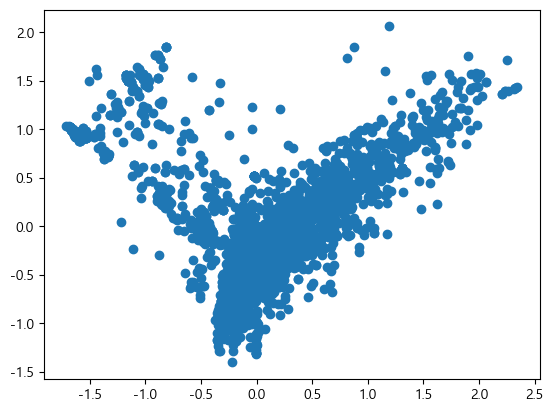

In [67]:
plt.scatter(data_pca[:,0],data_pca[:,1])
plt.show()

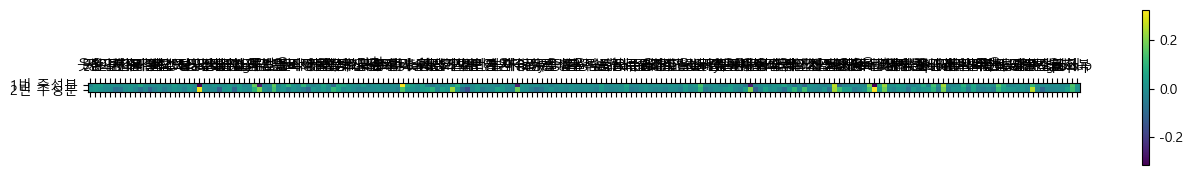

In [68]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1번 주성분','2번 주성분'])
plt.colorbar()
plt.xticks(range(200),sfx_tag_clustering.columns[1:])
plt.show()

In [69]:
df_hitmap=pd.DataFrame()
df_hitmap.index=sfx_tag_clustering.columns[1:]
df_hitmap['1번주성분']=list(pca.components_[0])
df_hitmap['2번주성분']=list(pca.components_[1])
df_hitmap.sort_values(by='1번주성분',ascending=False)

,1번주성분,2번주성분
소리효과,0.318900,0.150226
시선집중,0.259192,0.237906
장면전환,0.234763,0.191101
트랜지션,0.224089,0.187771
자막등장,0.195431,0.138128
...,...,...
아이,-0.245937,0.179592
여자,-0.249435,0.200400
여성,-0.252249,0.201430
보이스,-0.304896,0.310754


In [70]:
df_hitmap.sort_values(by='2번주성분',ascending=False)

,1번주성분,2번주성분
육성,-0.313639,0.325027
보이스,-0.304896,0.310754
카툰,0.110745,0.253308
시선집중,0.259192,0.237906
코믹,0.012758,0.228676
...,...,...
불길한,-0.001404,-0.101112
불길함,-0.003121,-0.105393
동물울음소리,-0.023406,-0.115265
긴장감,0.003621,-0.118800


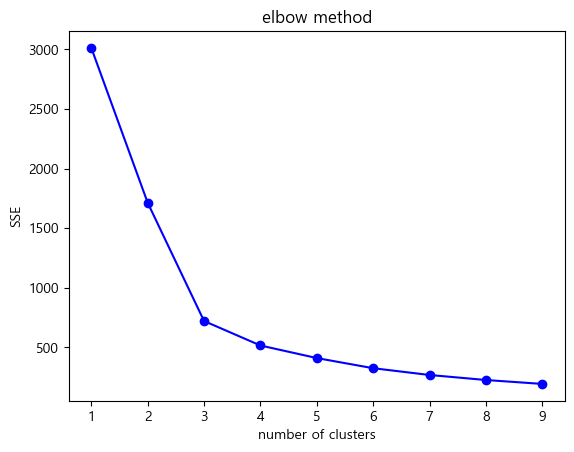

In [71]:
from sklearn.cluster import KMeans
df_data_pca = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(df_data_pca,10)

In [72]:
km = KMeans(n_clusters = 3,random_state=0)
df_data_pca['cluster_kmeans']= km.fit_predict(df_data_pca)
df_data_pca

,PC1,PC2,cluster_kmeans
0,0.120658,-0.299405,0
1,0.615493,0.651365,2
2,-0.263118,-0.629970,0
3,-0.173027,-0.504886,0
4,-0.210802,-0.544429,0
...,...,...,...
3558,-0.945162,0.471841,1
3559,0.565800,-0.154559,0
3560,-0.742055,0.577115,1
3561,-0.102704,-0.070007,0


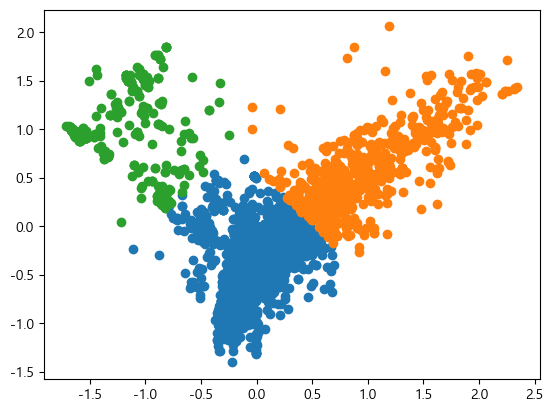

In [73]:
for i in df_data_pca['cluster_kmeans'].unique():
  data=df_data_pca[df_data_pca['cluster_kmeans']==i]
  plt.scatter(data['PC1'],data['PC2'])
plt.show()

In [74]:
sfx_tag_clustering['cluster']=list(df_data_pca['cluster_kmeans'])
sfx_tag_clustering

C:\Users\jhc74\AppData\Local\Temp\ipykernel_12920\2383098986.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sfx_tag_clustering['cluster']=list(df_data_pca['cluster_kmeans'])


,id,웃음,맑은,경고,사이렌,장엄한,총,군대,저주,치유,...,일상소리,불길한,싸움,정글,자동차,gross,경기,popup,회복,cluster
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,4166,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3648,4167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3649,4168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3650,4169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
for i in range(3):
    print(sfx_tag_clustering.groupby('cluster').sum().iloc[i,1:].sort_values(ascending=False).head(10))

소리효과      352
배경음       335
자연        319
동작        298
작동        289
게임        264
카툰        264
긴장감       244
동물울음소리    233
공포        229
Name: 0, dtype: int64
육성     402
보이스    382
여성     283
여자     280
아이     259
남성     127
남자     124
음성     111
코믹     110
목소리    100
Name: 1, dtype: int64
소리효과      458
시선집중      433
장면전환      347
트랜지션      328
자막등장      291
카툰        284
알림        251
팝업        221
notice    220
popup     190
Name: 2, dtype: int64


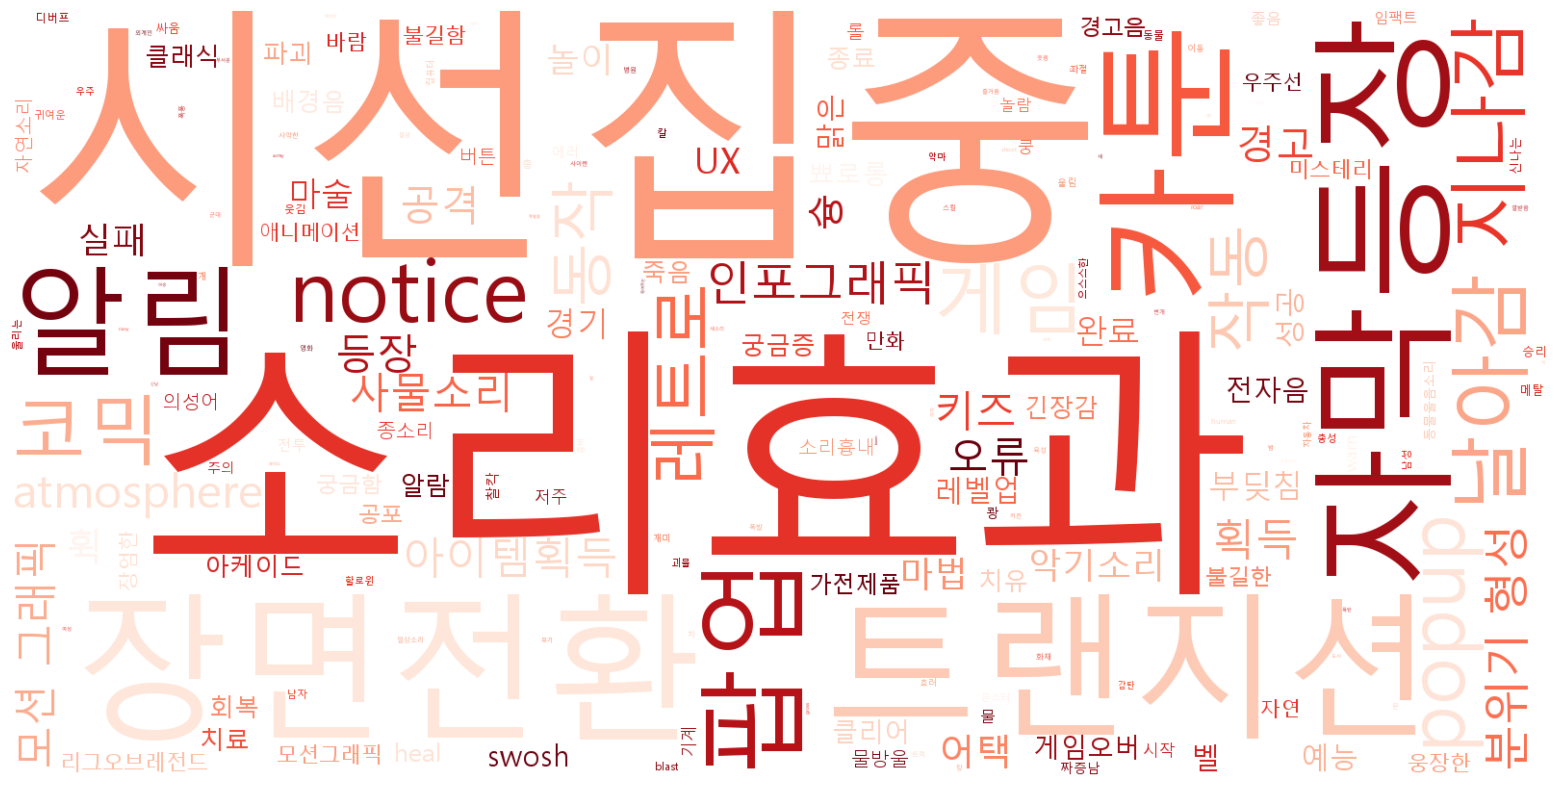

In [76]:
#pip install wordcloud
from wordcloud import WordCloud 
from PIL import *
plt.figure(figsize=(20,10))
palettes=['Greens_r','Blues_r','Reds_r']
for i in range(3):    
    words=sfx_tag_clustering.groupby('cluster').sum().iloc[i,1:].sort_values(ascending=False).to_dict()
    wordcloud = WordCloud(
        font_path = 'malgun.ttf',
        background_color='white',
        colormap=palettes[i],
        width=1600,
        height=800,
    ).generate_from_frequencies(words)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.savefig(f'wordcloud_sfx_group{i}.png')

In [77]:
download_data=pd.read_csv('data2/download.csv')
download_data

,user_id,model_id,model_type,created_at
0,13649,6114,Music::Song,2021-03-16 00:02:38.546267
1,55815,2574,Music::SoundEffect,2021-03-16 00:04:19.270351
2,55815,2562,Music::SoundEffect,2021-03-16 00:04:45.522705
3,57150,3512,Music::SoundEffect,2021-03-16 00:07:41.811291
4,55815,3527,Music::SoundEffect,2021-03-16 00:08:42.888535
...,...,...,...,...
530208,61846,3183,Music::SoundEffect,2022-10-12 17:31:08.767897
530209,118129,6265,Music::Song,2022-10-12 17:32:01.641734
530210,116026,2604,Music::SoundEffect,2022-10-12 17:32:11.980172
530211,116026,2604,Music::SoundEffect,2022-10-12 17:32:17.388932


In [78]:
sfx_tag_clustering[['id','cluster']]

,id,cluster
0,1,0
1,2,2
2,3,0
3,4,0
4,5,0
...,...,...
3647,4166,1
3648,4167,0
3649,4168,1
3650,4169,0


In [79]:
download_data_merged=download_data[download_data['model_type']=='Music::SoundEffect'].merge(sfx_tag_clustering[['id','cluster']],how='left',left_on='model_id',right_on='id').dropna()
download_data_merged['cluster']=download_data_merged['cluster'].astype('int')
download_data_merged

,user_id,model_id,model_type,created_at,id,cluster
0,55815,2574,Music::SoundEffect,2021-03-16 00:04:19.270351,2574.0,2
1,55815,2562,Music::SoundEffect,2021-03-16 00:04:45.522705,2562.0,2
2,57150,3512,Music::SoundEffect,2021-03-16 00:07:41.811291,3512.0,0
3,55815,3527,Music::SoundEffect,2021-03-16 00:08:42.888535,3527.0,1
4,57150,2439,Music::SoundEffect,2021-03-16 00:08:45.731547,2439.0,0
...,...,...,...,...,...,...
308292,95613,1554,Music::SoundEffect,2022-10-12 17:23:31.966846,1554.0,0
308293,61846,3149,Music::SoundEffect,2022-10-12 17:30:43.33869,3149.0,2
308294,61846,3183,Music::SoundEffect,2022-10-12 17:31:08.767897,3183.0,0
308295,116026,2604,Music::SoundEffect,2022-10-12 17:32:11.980172,2604.0,0


In [80]:
user_sfxcluster_pivot=pd.pivot_table(download_data_merged,index='user_id',columns='cluster',values='model_id',aggfunc='count').fillna(0).astype('int')
user_sfxcluster_pivot

cluster,0,1,2
user_id,,,
1,16,6,38
29,21,4,29
30,22,5,32
336,0,0,1
347,2,0,3
...,...,...,...
118114,2,0,0
118121,3,0,0
118123,7,0,0


In [81]:
favorite_cluster=[]
for i in range(len(user_sfxcluster_pivot)):
    favorite_cluster.append(list(user_sfxcluster_pivot.iloc[i]).index(user_sfxcluster_pivot.iloc[i].max()))
favorite_cluster

[2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,


In [82]:
user_sfxcluster_pivot['favorite_sfx_cluster']=favorite_cluster
user_sfxcluster_pivot

cluster,0,1,2,favorite_sfx_cluster
user_id,,,,
1,16,6,38,2
29,21,4,29,2
30,22,5,32,2
336,0,0,1,2
347,2,0,3,2
...,...,...,...,...
118114,2,0,0,0
118121,3,0,0,0
118123,7,0,0,0


In [83]:
user_sfxcluster_pivot.groupby('favorite_sfx_cluster').count()

cluster,0,1,2
favorite_sfx_cluster,,,
0,29431,29431,29431
1,532,532,532
2,12264,12264,12264


In [84]:
user_sfx_cluster=user_sfxcluster_pivot.reset_index()
user_sfx_cluster

cluster,user_id,0,1,2,favorite_sfx_cluster
0,1,16,6,38,2
1,29,21,4,29,2
2,30,22,5,32,2
3,336,0,0,1,2
4,347,2,0,3,2
...,...,...,...,...,...
42222,118114,2,0,0,0
42223,118121,3,0,0,0
42224,118123,7,0,0,0
42225,118125,2,0,0,0


In [85]:
user_data=pd.read_csv('data2/user.csv')
user_data

,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre
0,1,7201,2022-10-12 13:02:17.591454,unknown,2018-05-11 16:40:21.438831,"[""vlog""]"
1,12,49,2021-10-08 12:57:26.888627,individual,2018-05-30 14:03:40.989853,[]
2,29,23,2022-07-27 15:19:21.166285,student,2018-08-02 20:53:28.357226,[]
3,30,241,2022-08-24 09:59:47.362796,unknown,2018-08-06 11:40:28.257467,NaN
4,31,0,NaN,unknown,2018-08-07 09:33:28.384289,NaN
...,...,...,...,...,...,...
102789,118123,1,2022-10-12 16:55:58.940188,individual,2022-10-12 16:55:58.794543,NaN
102790,118124,1,2022-10-12 17:01:59.327448,unknown,2022-10-12 17:00:33.539441,NaN
102791,118125,1,2022-10-12 17:08:15.513844,corporate,2022-10-12 17:08:15.45703,NaN
102792,118126,1,2022-10-12 17:13:04.84597,individual,2022-10-12 17:13:04.794371,NaN


In [86]:
user_cluster_merged=user_data.merge(user_sfxcluster_pivot,how='left',left_on='id',right_on='user_id')
user_cluster_merged

,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre,0,1,2,favorite_sfx_cluster
0,1,7201,2022-10-12 13:02:17.591454,unknown,2018-05-11 16:40:21.438831,"[""vlog""]",16.0,6.0,38.0,2.0
1,12,49,2021-10-08 12:57:26.888627,individual,2018-05-30 14:03:40.989853,[],NaN,NaN,NaN,NaN
2,29,23,2022-07-27 15:19:21.166285,student,2018-08-02 20:53:28.357226,[],21.0,4.0,29.0,2.0
3,30,241,2022-08-24 09:59:47.362796,unknown,2018-08-06 11:40:28.257467,NaN,22.0,5.0,32.0,2.0
4,31,0,NaN,unknown,2018-08-07 09:33:28.384289,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
102789,118123,1,2022-10-12 16:55:58.940188,individual,2022-10-12 16:55:58.794543,NaN,7.0,0.0,0.0,0.0
102790,118124,1,2022-10-12 17:01:59.327448,unknown,2022-10-12 17:00:33.539441,NaN,NaN,NaN,NaN,NaN
102791,118125,1,2022-10-12 17:08:15.513844,corporate,2022-10-12 17:08:15.45703,NaN,2.0,0.0,0.0,0.0
102792,118126,1,2022-10-12 17:13:04.84597,individual,2022-10-12 17:13:04.794371,NaN,NaN,NaN,NaN,NaN


In [87]:
user_cluster_merged['not_downloaded']=user_cluster_merged['favorite_sfx_cluster'].isnull()
user_cluster_merged=user_cluster_merged[user_cluster_merged['not_downloaded']==False]
user_cluster_merged

,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre,0,1,2,favorite_sfx_cluster,not_downloaded
0,1,7201,2022-10-12 13:02:17.591454,unknown,2018-05-11 16:40:21.438831,"[""vlog""]",16.0,6.0,38.0,2.0,False
2,29,23,2022-07-27 15:19:21.166285,student,2018-08-02 20:53:28.357226,[],21.0,4.0,29.0,2.0,False
3,30,241,2022-08-24 09:59:47.362796,unknown,2018-08-06 11:40:28.257467,NaN,22.0,5.0,32.0,2.0,False
37,347,26,2021-12-27 01:53:09.903841,unknown,2019-01-05 17:28:23.201176,NaN,2.0,0.0,3.0,2.0,False
38,350,3,2021-06-25 13:11:38.364806,unknown,2019-01-05 19:19:26.918876,"[""story""]",1.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
102779,118113,1,2022-10-12 14:55:48.855349,individual,2022-10-12 14:55:48.803023,NaN,0.0,0.0,1.0,2.0,False
102780,118114,1,2022-10-12 15:14:59.584211,corporate,2022-10-12 15:14:59.484671,NaN,2.0,0.0,0.0,0.0,False
102787,118121,1,2022-10-12 16:35:40.465258,student,2022-10-12 16:32:55.852217,NaN,3.0,0.0,0.0,0.0,False
102789,118123,1,2022-10-12 16:55:58.940188,individual,2022-10-12 16:55:58.794543,NaN,7.0,0.0,0.0,0.0,False


In [88]:
user_cluster_merged['favorite_genre']=user_cluster_merged['favorite_genre'].fillna('[]').apply(lambda x: x[1:-1].replace('\"','').replace(' ','').split(','))
user_cluster_merged

C:\Users\jhc74\AppData\Local\Temp\ipykernel_12920\4284722559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_cluster_merged['favorite_genre']=user_cluster_merged['favorite_genre'].fillna('[]').apply(lambda x: x[1:-1].replace('\"','').replace(' ','').split(','))


,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre,0,1,2,favorite_sfx_cluster,not_downloaded
0,1,7201,2022-10-12 13:02:17.591454,unknown,2018-05-11 16:40:21.438831,[vlog],16.0,6.0,38.0,2.0,False
2,29,23,2022-07-27 15:19:21.166285,student,2018-08-02 20:53:28.357226,[],21.0,4.0,29.0,2.0,False
3,30,241,2022-08-24 09:59:47.362796,unknown,2018-08-06 11:40:28.257467,[],22.0,5.0,32.0,2.0,False
37,347,26,2021-12-27 01:53:09.903841,unknown,2019-01-05 17:28:23.201176,[],2.0,0.0,3.0,2.0,False
38,350,3,2021-06-25 13:11:38.364806,unknown,2019-01-05 19:19:26.918876,[story],1.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
102779,118113,1,2022-10-12 14:55:48.855349,individual,2022-10-12 14:55:48.803023,[],0.0,0.0,1.0,2.0,False
102780,118114,1,2022-10-12 15:14:59.584211,corporate,2022-10-12 15:14:59.484671,[],2.0,0.0,0.0,0.0,False
102787,118121,1,2022-10-12 16:35:40.465258,student,2022-10-12 16:32:55.852217,[],3.0,0.0,0.0,0.0,False
102789,118123,1,2022-10-12 16:55:58.940188,individual,2022-10-12 16:55:58.794543,[],7.0,0.0,0.0,0.0,False


In [89]:
user_cluster_merged['not_empty']=user_cluster_merged['favorite_genre'].apply(lambda x: False if '' in x else True)
user_cluster_merged=user_cluster_merged[user_cluster_merged['not_empty']]
user_cluster_merged

C:\Users\jhc74\AppData\Local\Temp\ipykernel_12920\1978020923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_cluster_merged['not_empty']=user_cluster_merged['favorite_genre'].apply(lambda x: False if '' in x else True)


,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre,0,1,2,favorite_sfx_cluster,not_downloaded,not_empty
0,1,7201,2022-10-12 13:02:17.591454,unknown,2018-05-11 16:40:21.438831,[vlog],16.0,6.0,38.0,2.0,False,True
38,350,3,2021-06-25 13:11:38.364806,unknown,2019-01-05 19:19:26.918876,[story],1.0,0.0,0.0,0.0,False,True
47,592,15,2022-07-04 20:04:14.257908,corporate,2019-01-13 01:02:15.29538,"[vlog, story]",242.0,184.0,159.0,0.0,False,True
48,621,46,2021-08-24 10:17:34.292617,unknown,2019-01-13 19:34:37.007669,"[vlog, pet]",3.0,0.0,0.0,0.0,False,True
66,845,7,2021-07-03 13:30:54.582512,unknown,2019-01-19 04:57:34.190884,[vlog],1.0,0.0,0.0,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
72422,86032,1,2021-12-08 15:52:49.511953,corporate,2021-12-08 15:52:07.771487,[review],0.0,0.0,2.0,2.0,False,True
72424,86034,1,2021-12-08 16:00:55.222449,unknown,2021-12-08 15:58:18.164371,[story],0.0,0.0,1.0,2.0,False,True
72426,86036,1,2021-12-08 16:04:43.798833,unknown,2021-12-08 16:03:29.785138,"[talk, game]",2.0,0.0,3.0,2.0,False,True
72427,86037,1,2021-12-08 16:05:22.19967,unknown,2021-12-08 16:04:57.110703,[game],1.0,0.0,2.0,2.0,False,True


In [90]:
genre_set=set()
for i in user_cluster_merged['favorite_genre']:
  genre_set.update(set(i))
genre_list=list(genre_set)[1:]
genre_list

['story', 'vlog', 'talk', 'game', 'pet', 'review', 'kids', 'drone', 'beauty']

In [91]:
for i in genre_list:
  user_cluster_merged[i]=user_cluster_merged['favorite_genre'].apply(lambda x: 1 if i in x else 0)
user_cluster_merged

C:\Users\jhc74\AppData\Local\Temp\ipykernel_12920\3524141273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_cluster_merged[i]=user_cluster_merged['favorite_genre'].apply(lambda x: 1 if i in x else 0)
C:\Users\jhc74\AppData\Local\Temp\ipykernel_12920\3524141273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_cluster_merged[i]=user_cluster_merged['favorite_genre'].apply(lambda x: 1 if i in x else 0)
C:\Users\jhc74\AppData\Local\Temp\ipykernel_12920\3524141273.py:2: SettingWithCopyWarning: 


,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre,0,1,2,favorite_sfx_cluster,...,not_empty,story,vlog,talk,game,pet,review,kids,drone,beauty
0,1,7201,2022-10-12 13:02:17.591454,unknown,2018-05-11 16:40:21.438831,[vlog],16.0,6.0,38.0,2.0,...,True,0,1,0,0,0,0,0,0,0
38,350,3,2021-06-25 13:11:38.364806,unknown,2019-01-05 19:19:26.918876,[story],1.0,0.0,0.0,0.0,...,True,1,0,0,0,0,0,0,0,0
47,592,15,2022-07-04 20:04:14.257908,corporate,2019-01-13 01:02:15.29538,"[vlog, story]",242.0,184.0,159.0,0.0,...,True,1,1,0,0,0,0,0,0,0
48,621,46,2021-08-24 10:17:34.292617,unknown,2019-01-13 19:34:37.007669,"[vlog, pet]",3.0,0.0,0.0,0.0,...,True,0,1,0,0,1,0,0,0,0
66,845,7,2021-07-03 13:30:54.582512,unknown,2019-01-19 04:57:34.190884,[vlog],1.0,0.0,0.0,0.0,...,True,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72422,86032,1,2021-12-08 15:52:49.511953,corporate,2021-12-08 15:52:07.771487,[review],0.0,0.0,2.0,2.0,...,True,0,0,0,0,0,1,0,0,0
72424,86034,1,2021-12-08 16:00:55.222449,unknown,2021-12-08 15:58:18.164371,[story],0.0,0.0,1.0,2.0,...,True,1,0,0,0,0,0,0,0,0
72426,86036,1,2021-12-08 16:04:43.798833,unknown,2021-12-08 16:03:29.785138,"[talk, game]",2.0,0.0,3.0,2.0,...,True,0,0,1,1,0,0,0,0,0
72427,86037,1,2021-12-08 16:05:22.19967,unknown,2021-12-08 16:04:57.110703,[game],1.0,0.0,2.0,2.0,...,True,0,0,0,1,0,0,0,0,0


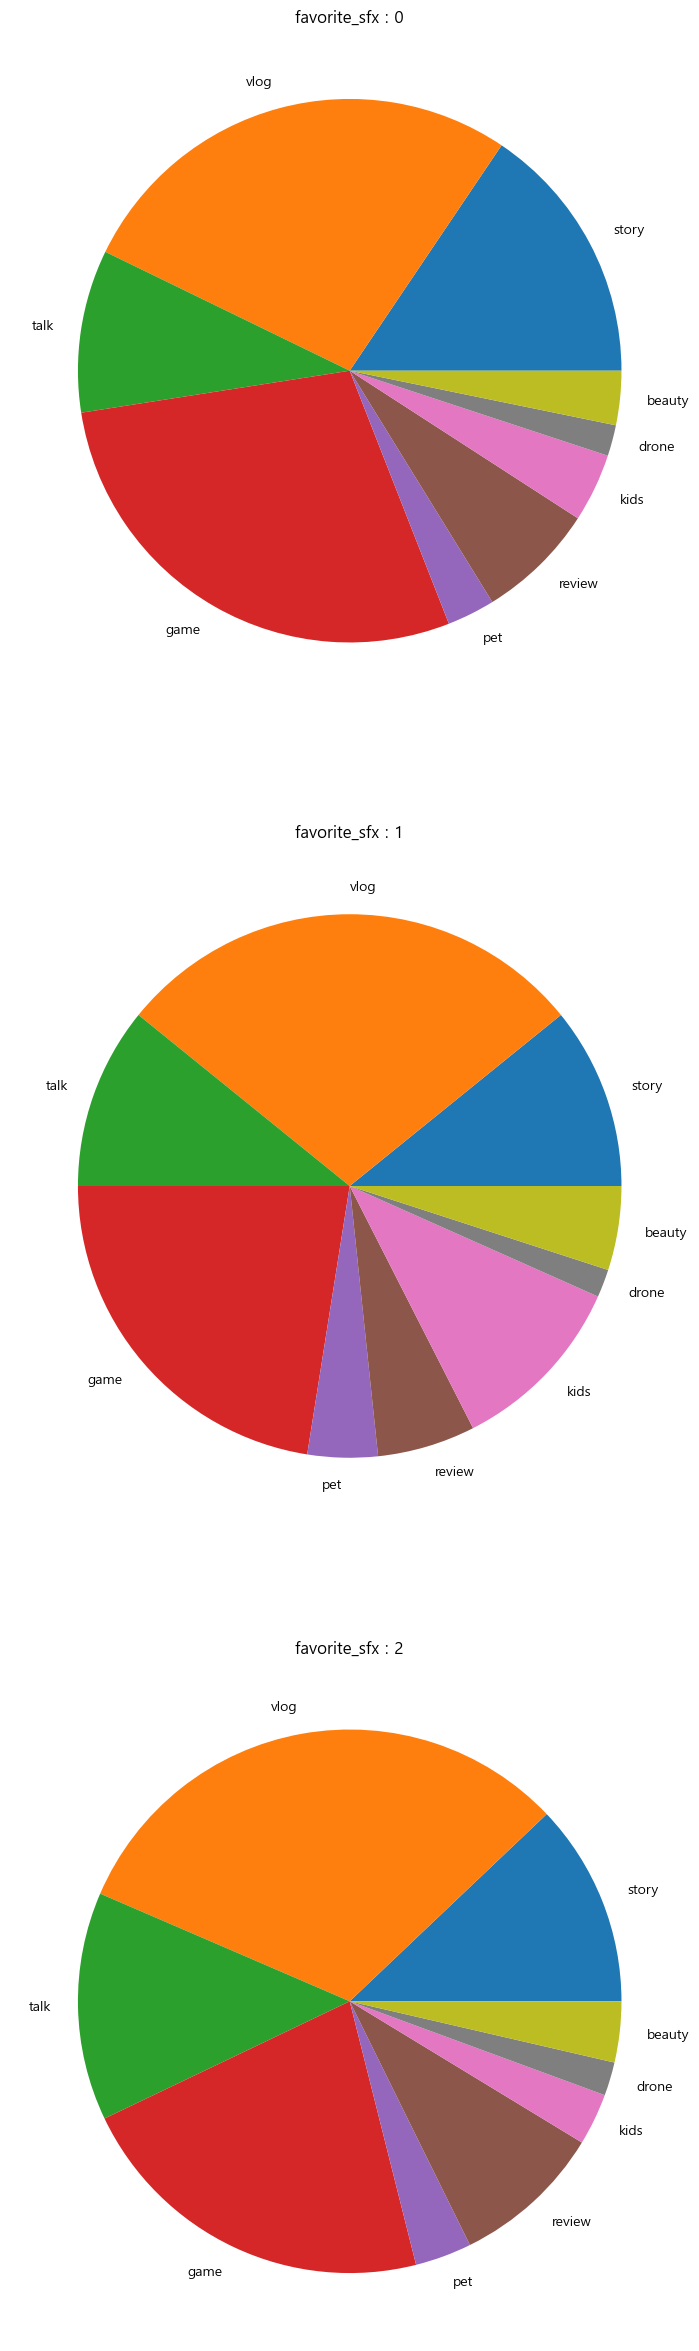

In [92]:
sfx_calc=user_cluster_merged.drop(columns=['id','sign_in_count','last_sign_in_at','user_type','created_at','favorite_genre',0,1,2,'not_downloaded','not_empty'])
data=sfx_calc.groupby('favorite_sfx_cluster').sum()

plt.figure(figsize=(15,30))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.pie(data.iloc[i],labels=data.iloc[i].index)
    plt.title(f'favorite_sfx : {i}')
plt.show()